# YOUTUBE TRENDING KEYWORD PREDICTION

In [1]:
# importing the necessary libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set()

In [2]:
# reading CSV files

Ng_data = pd.read_csv("NG_youtube_data.csv", encoding='utf-8')
US_data = pd.read_csv("us_Youtube_data.csv", encoding='utf-8')

In [3]:
Ng_data.head(3)

title      videoId  \
0  FAMILY MATTERS | Brodashaggi | Mr Ibu | Kiriku...  Zv1i-Cdn4Ik   
1  Best Friends in the World: Senior Year | Episo...  BmCkK7W7j0Q   
2  ROMOLA ALAKARA - Latest 2022 Yoruba Movie Star...  seZb9P7H6MU   

                  channelId           channelTitle  categoryId  \
0  UCG6orNVuXIICv9_ifH6msIA  official BRODA SHAGGI          23   
1  UCCl71WmqkG8BjVuySOSCh_Q       Neptune3 Studios           1   
2  UCK2-495cMvdhaMqXcLlgmcg             YORUBAPLAY          24   

  VideoCategoryDescription                                        Description  \
0                   Comedy  Please SUBSCRIBE to Broda Shaggi Official YouT...   
1         Film & Animation  EP 13 "The Protest" - Olive leads a protest ag...   
2            Entertainment  Find out where the story leads in this latest ...   

   viewCount  likeCount  dislikeCount  commentCount  favoriteCount  \
0     654033      30422             0          1474              0   
1     299169      21292             0          2012              0   
2     553886       5252             0           586              0   

  publishedAt   duration  
0  22/10/2022   PT10M18S  
1  28/10/2022  PT1H5M22S  
2  21/10/2022  PT1H9M27S

In [4]:
US_data.head(3)

channelId    channelTitle      videoId  \
0  UCU1_l0ZJyTK_7HZZ3Ruw8Dg            MAPS  pTnk3ziVVRM   
1  UCLuO2lUqHrPIIpx0hFenV2g  Tink Tink Club  cuJjSeHZIrg   
2  UCihqrkaOgVMfLNo2W1hSliA    Podcast Bunk  IuyuZfWtGgg   

                publishedAt  \
0  2014-01-10T01:24:57.000Z   
1  2015-06-18T16:56:04.000Z   
2  2016-05-01T05:33:13.000Z   

                                          videoTitle  \
0  Psychedelic Horizons Beyond Psychotherapy Work...   
1                     Episode 35 - Dr. James Fadiman   
2  #325 Microdosing from The Adam and Dr Drew Sho...   

                                    videoDescription  videoCategoryId  \
0  Watch the full workshop at http://psychedelics...               29   
1  Dr. James Fadiman is the father of modern psyc...               22   
2  Adam and Dr. Drew are solo today and they open...               22   

      videoCategoryLabel    duration  durationSec definition  caption  \
0  Nonprofits & Activism  PT1H19M40S         4780         hd    False   
1         People & Blogs  PT1H12M34S         4354         sd    False   
2         People & Blogs    PT50M40S         3040         sd    False   

   viewCount  likeCount  dislikeCount  commentCount  
0       1512        8.0           0.0           1.0  
1        881       14.0           0.0           3.0  
2         67        0.0           1.0           3.0

In [5]:
Ng_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     50 non-null     object
 1   videoId                   50 non-null     object
 2   channelId                 50 non-null     object
 3   channelTitle              50 non-null     object
 4   categoryId                50 non-null     int64 
 5   VideoCategoryDescription  50 non-null     object
 6   Description               44 non-null     object
 7   viewCount                 50 non-null     int64 
 8   likeCount                 50 non-null     int64 
 9   dislikeCount              50 non-null     int64 
 10  commentCount              50 non-null     int64 
 11  favoriteCount             50 non-null     int64 
 12  publishedAt               50 non-null     object
 13  duration                  50 non-null     object
dtypes: int64(6), object(8)
memor

In [6]:
US_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   channelId           115 non-null    object 
 1   channelTitle        115 non-null    object 
 2   videoId             115 non-null    object 
 3   publishedAt         115 non-null    object 
 4   videoTitle          115 non-null    object 
 5   videoDescription    109 non-null    object 
 6   videoCategoryId     115 non-null    int64  
 7   videoCategoryLabel  115 non-null    object 
 8   duration            115 non-null    object 
 9   durationSec         115 non-null    int64  
 10  definition          115 non-null    object 
 11  caption             115 non-null    bool   
 12  viewCount           115 non-null    int64  
 13  likeCount           111 non-null    float64
 14  dislikeCount        111 non-null    float64
 15  commentCount        113 non-null    float64
dtypes: bool(

In [7]:
US_data = US_data.iloc[:80]
US_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   channelId           80 non-null     object 
 1   channelTitle        80 non-null     object 
 2   videoId             80 non-null     object 
 3   publishedAt         80 non-null     object 
 4   videoTitle          80 non-null     object 
 5   videoDescription    76 non-null     object 
 6   videoCategoryId     80 non-null     int64  
 7   videoCategoryLabel  80 non-null     object 
 8   duration            80 non-null     object 
 9   durationSec         80 non-null     int64  
 10  definition          80 non-null     object 
 11  caption             80 non-null     bool   
 12  viewCount           80 non-null     int64  
 13  likeCount           76 non-null     float64
 14  dislikeCount        76 non-null     float64
 15  commentCount        78 non-null     float64
dtypes: bool(1)

### Sorting Needed Columns For Nigeria's Current Trending YouTube Video Dataset:
###### Here we are creating a dataframe that shows the trending Nigerian Dataset by Video Category Decription and View Counts in ascending order.

###### So we have 7 trending Nigerian YouTube Video Categories and they are as follows:
       Comedy, Entertainment, Film & Animation, Music, News & Politics, People & Blogs, and Sports.
    
###### The highest trending video under Comedy has 1,629,458 viewCounts
###### The highest trending video under <font color=red>Entertainment</font> has 34,543,612 viewCounts
###### The highest trending video under Film & Animation has 1,648,620 viewCounts
###### The highest trending video under Music has 12,173,797 viewCounts 
###### The highest trending video under News & Politics has 274,827 viewCounts
###### The highest trending video under People & Blogs has 574,391 viewCounts
###### The highest trending video under Sports has 7,154,769 viewCounts

###### Out of all the 7 trending Nigerian Youtube Video Categories, <font color=red>Entertainment</font> seems to have the most viewcount , therefore making it the highest trending youtube video category currently in Nigeria!


In [8]:
Ng_data.sort_values(["viewCount", "likeCount", "commentCount"], ascending=[True, True, True], inplace= True)

In [9]:
Ng_data.head()

title      videoId  \
35                                      SEE WAHALA O   qo-K3YlcfU0   
26  Blaqbonez - Fake Nikes (Feat. Blxckie & Cheque...  oL_NxgHJ_M4   
40  PERFECT ASSISTANT- Watch Maurice Sam and Shine...  MyVG-UcdLU8   
14                              The Reign of Omo Igbo  ASnTvDizlWY   
17  Aranda Ekun Part 3 - Latest Yoruba Movie 2022 ...  bC95DBzHuw8   

                   channelId             channelTitle  categoryId  \
35  UCjSzBGfo9gDXP0OerKJ9GZg              Twyse Ereme          24   
26  UC0iZ_gqCk22K0jWscf75lhg                Blaqbonez          10   
40  UCnZ28GESUBXyZSIvzcs1RXA        ChinneyLoveEze Tv          24   
14  UCIwUNuYEcZiiJqjU04yN30A  AyoAjewole Woliagba-YPM          23   
17  UC3BYT_REpOi_DNhluVO2ndw               Yorubahood          24   

   VideoCategoryDescription  \
35            Entertainment   
26                    Music   
40            Entertainment   
14                   Comedy   
17            Entertainment   

                                          Description  viewCount  likeCount  \
35  #IzzGone #TwyseAndFamily\n\nTwyse and Family T...      80375       6174   
26  Get "Young Preacher"  by BLAQBONEZ here: https...      83489       8767   
40  Subscribe to our YouTube channel\nhttps://www....     116950       2737   
14                                                NaN     121465       4091   
17  The youths of Ilu Iloro want Morolayo Adunni t...     122437       2877   

    dislikeCount  commentCount  favoriteCount publishedAt    duration  
35             0           223              0  24/10/2022     PT2M11S  
26             0           710              0  26/10/2022     PT1M33S  
40             0           269              0  28/10/2022  PT1H25M18S  
14             0           511              0  23/10/2022    PT17M39S  
17             0           505              0  28/10/2022    PT1H4M8S

# Sorting Needed Columns for United State's Current Trending Youtube Video Dataset:
###### Here we are creating a dataframe that shows the trending United State Dataset by Video Category Label and View Count in ascending order.

###### So we have 13 trending United State YouTube Video Categories and they are as follows:
       Comedy, Entertainment, Film & Animation, Music, News & Politics, People & Blogs, Sports, Education, Science & Technology, Howto & Style, Nonprofits & Activism, Gaming, and Travel & Events.
    
###### The highest trending video under Comedy has 515 viewCounts
###### The highest trending video under <font color=red>Entertainment</font> has 148,681 viewCounts
###### The highest trending video under Film & Animation has 4,040 viewCounts
###### The highest trending video under Music has 160 viewCounts 
###### The highest trending video under News & Politics has 108,974 viewCounts
###### The highest trending video under People & Blogs has 18,908 viewCounts
###### The highest trending video under Sports has 1,805 viewCounts
###### The highest trending video under  Education has 35,928 viewCounts
###### The highest trending video under Science & Technology has 30 viewCounts
###### The highest trending video under  Howto & Style has 294 viewCounts
###### The highest trending video under  Nonprofits & Activism has 1,512 viewCounts
###### The highest trending video under Gaming has 1,851 viewCounts
###### The highest trending video under Travel & Events has 843 viewCounts


###### Out of all the 13 trending United State Youtube Video Categories, <font color=red>Entertainment</font> again seems to have the most viewcount , therefore making it the highest trending youtube video category currently in the United States!



In [10]:
US_data.sort_values(["viewCount", "likeCount", "commentCount"], ascending=[True, True, True], inplace= True)
US_data.head(4)

channelId           channelTitle      videoId  \
8   UC2nzGL6I-SRc_gkBLWLDVWg          ellie pipkins  akZrftACY1I   
74  UCGcF4QHx-bUGNT7nIo-cxDQ           Motion Brand  DwDowxM5HLI   
3   UCgbWWPn3VYYzxjffZbfj9GQ        Alan Springwind  cng_ZhQf8iY   
50  UCxw4-gbOtqRLdh9C3Ne-XAw  E-PAK Machinery, Inc.  b0RDMUgn_3E   

                 publishedAt  \
8   2016-06-04T12:39:29.000Z   
74  2016-05-20T10:16:37.000Z   
3   2016-01-25T04:48:22.000Z   
50  2016-06-03T20:28:37.000Z   

                                           videoTitle  \
8                 LSD: Microdosing & the SUPERNATURAL   
74                                  Jesma Microdosing   
3                 Microdosing Away The Same Old Blues   
50  Fully Automatic Micro Dosing Piston Filler for...   

                                     videoDescription  videoCategoryId  \
8   a original. If you would like to support this ...               22   
74                                                NaN               22   
3   Source: https://www.spreaker.com/user/springwi...               24   
50  8 Head Fully Automatic Micro Dosing Piston Fil...               28   

      videoCategoryLabel  duration  durationSec definition  caption  \
8         People & Blogs  PT13M32S          812         hd    False   
74        People & Blogs   PT2M21S          141         hd    False   
3          Entertainment  PT32M21S         1941         hd    False   
50  Science & Technology   PT4M17S          257         hd    False   

    viewCount  likeCount  dislikeCount  commentCount  
8           2        0.0           0.0           0.0  
74          3        0.0           0.0           0.0  
3           4        0.0           0.0           0.0  
50         11        NaN           NaN           0.0

In [11]:
# Renaming some columns in the US data

US_data["VideoCategoryDescription"] = US_data["videoCategoryLabel"]
US_data["Description"] = US_data["videoDescription"]

In [12]:
Ng_data.isna().sum()

title                       0
videoId                     0
channelId                   0
channelTitle                0
categoryId                  0
VideoCategoryDescription    0
Description                 6
viewCount                   0
likeCount                   0
dislikeCount                0
commentCount                0
favoriteCount               0
publishedAt                 0
duration                    0
dtype: int64

In [13]:
US_data.isna().sum()

channelId                   0
channelTitle                0
videoId                     0
publishedAt                 0
videoTitle                  0
videoDescription            4
videoCategoryId             0
videoCategoryLabel          0
duration                    0
durationSec                 0
definition                  0
caption                     0
viewCount                   0
likeCount                   4
dislikeCount                4
commentCount                2
VideoCategoryDescription    0
Description                 4
dtype: int64

In [14]:
Ng_data = Ng_data.dropna()
print(Ng_data.isna().sum())

title                       0
videoId                     0
channelId                   0
channelTitle                0
categoryId                  0
VideoCategoryDescription    0
Description                 0
viewCount                   0
likeCount                   0
dislikeCount                0
commentCount                0
favoriteCount               0
publishedAt                 0
duration                    0
dtype: int64


In [15]:
US_data = US_data.dropna()
print(US_data.isna().sum())

channelId                   0
channelTitle                0
videoId                     0
publishedAt                 0
videoTitle                  0
videoDescription            0
videoCategoryId             0
videoCategoryLabel          0
duration                    0
durationSec                 0
definition                  0
caption                     0
viewCount                   0
likeCount                   0
dislikeCount                0
commentCount                0
VideoCategoryDescription    0
Description                 0
dtype: int64


In [16]:
Ng_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 35 to 46
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     44 non-null     object
 1   videoId                   44 non-null     object
 2   channelId                 44 non-null     object
 3   channelTitle              44 non-null     object
 4   categoryId                44 non-null     int64 
 5   VideoCategoryDescription  44 non-null     object
 6   Description               44 non-null     object
 7   viewCount                 44 non-null     int64 
 8   likeCount                 44 non-null     int64 
 9   dislikeCount              44 non-null     int64 
 10  commentCount              44 non-null     int64 
 11  favoriteCount             44 non-null     int64 
 12  publishedAt               44 non-null     object
 13  duration                  44 non-null     object
dtypes: int64(6), object(8)
memo

In [17]:
# subsetting the columns to just the specific columns necessary.

Ng_data =Ng_data[["title","videoId", "VideoCategoryDescription", "Description", "viewCount" , "likeCount", "commentCount"]]

Ng_data.head()

title      videoId  \
35                                      SEE WAHALA O   qo-K3YlcfU0   
26  Blaqbonez - Fake Nikes (Feat. Blxckie & Cheque...  oL_NxgHJ_M4   
40  PERFECT ASSISTANT- Watch Maurice Sam and Shine...  MyVG-UcdLU8   
17  Aranda Ekun Part 3 - Latest Yoruba Movie 2022 ...  bC95DBzHuw8   
49                                  Police Internship  veIB8gLx5GM   

   VideoCategoryDescription  \
35            Entertainment   
26                    Music   
40            Entertainment   
17            Entertainment   
49                   Comedy   

                                          Description  viewCount  likeCount  \
35  #IzzGone #TwyseAndFamily\n\nTwyse and Family T...      80375       6174   
26  Get "Young Preacher"  by BLAQBONEZ here: https...      83489       8767   
40  Subscribe to our YouTube channel\nhttps://www....     116950       2737   
17  The youths of Ilu Iloro want Morolayo Adunni t...     122437       2877   
49  Tegwolo's father has just joined the police. T...     135198       5985   

    commentCount  
35           223  
26           710  
40           269  
17           505  
49           195

In [18]:
# subsetting the columns to just the specific columns necessary.

US_data =US_data[["channelTitle","videoId", "VideoCategoryDescription", "Description", "viewCount" , "likeCount", "commentCount"]]

US_data.head(5)

channelTitle      videoId VideoCategoryDescription  \
8     ellie pipkins  akZrftACY1I           People & Blogs   
3   Alan Springwind  cng_ZhQf8iY            Entertainment   
16        CABIvideo  xl7pRQGIMdg     Science & Technology   
72       ICRISAT Co  dgWKr3Mymcw    Nonprofits & Activism   
60       ICRISAT Co  VjrWr7mpruI    Nonprofits & Activism   

                                          Description  viewCount  likeCount  \
8   a original. If you would like to support this ...          2        0.0   
3   Source: https://www.spreaker.com/user/springwi...          4        0.0   
16  Farmer to farmer training video on fighting st...         14        0.0   
72  Microdosing: Up-scaling Dr Ramadjita Tabo, Reg...         15        0.0   
60  Future of microdosing Dr Ramadjita Tabo, Regio...         23        0.0   

    commentCount  
8            0.0  
3            0.0  
16           0.0  
72           0.0  
60           0.0

In [19]:
Ng_data.describe()

viewCount     likeCount  commentCount
count  4.400000e+01  4.400000e+01     44.000000
mean   2.338803e+06  1.467370e+05   3672.886364
std    5.549736e+06  5.714969e+05   7529.054492
min    8.037500e+04  1.745000e+03      0.000000
25%    2.030915e+05  4.876750e+03    304.250000
50%    6.039595e+05  1.166200e+04    613.000000
75%    1.657581e+06  5.696525e+04   2732.500000
max    3.454361e+07  3.757194e+06  32438.000000

In [20]:
US_data.describe()

viewCount    likeCount  commentCount
count      72.000000    72.000000     72.000000
mean    14431.930556   264.500000    119.861111
std     65331.304830  1054.726772    495.047936
min         2.000000     0.000000      0.000000
25%       153.000000     0.000000      0.000000
50%       610.000000     5.000000      1.500000
75%      2364.750000    28.000000     25.250000
max    526243.000000  7046.000000   3672.000000

In [21]:
Ng_data.corr()

/var/folders/0c/ztv6vp6971zcyw9kflycnw100000gn/T/ipykernel_2692/3142781792.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Ng_data.corr()


viewCount  likeCount  commentCount
viewCount      1.000000   0.954152      0.714238
likeCount      0.954152   1.000000      0.641059
commentCount   0.714238   0.641059      1.000000

In [22]:
US_data.corr()

/var/folders/0c/ztv6vp6971zcyw9kflycnw100000gn/T/ipykernel_2692/230828419.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  US_data.corr()


viewCount  likeCount  commentCount
viewCount      1.000000   0.932612      0.615707
likeCount      0.932612   1.000000      0.839458
commentCount   0.615707   0.839458      1.000000

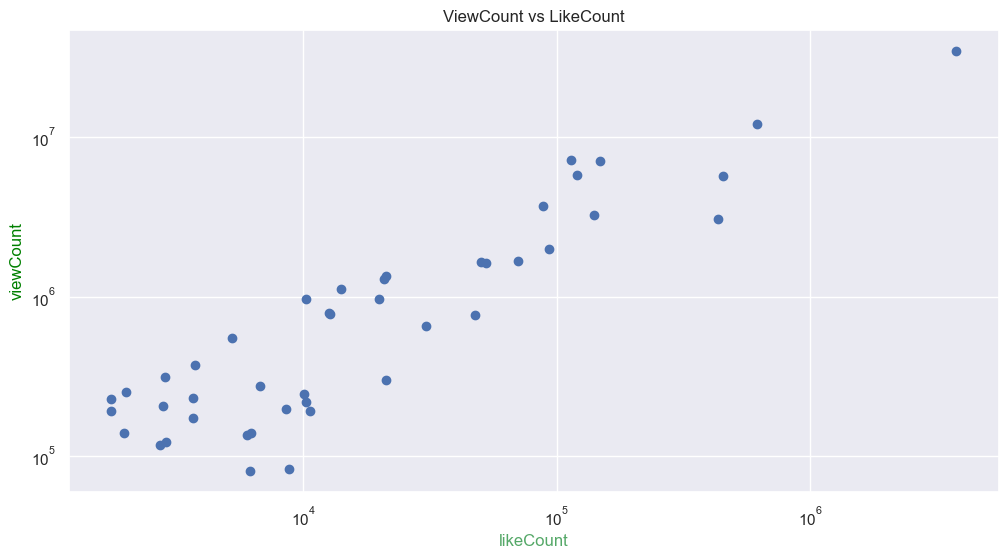

In [23]:
plt.figure(figsize=(12,6))
plt.scatter(Ng_data['likeCount'], Ng_data['viewCount'])
plt.xscale("log")
plt.yscale('log')
plt.style.use('seaborn-v0_8-colorblind')
plt.title("ViewCount vs LikeCount")
plt.ylabel("viewCount", color= "Green")
plt.xlabel("likeCount", color= "g")

plt.savefig("NG_plot.png")
plt.show()

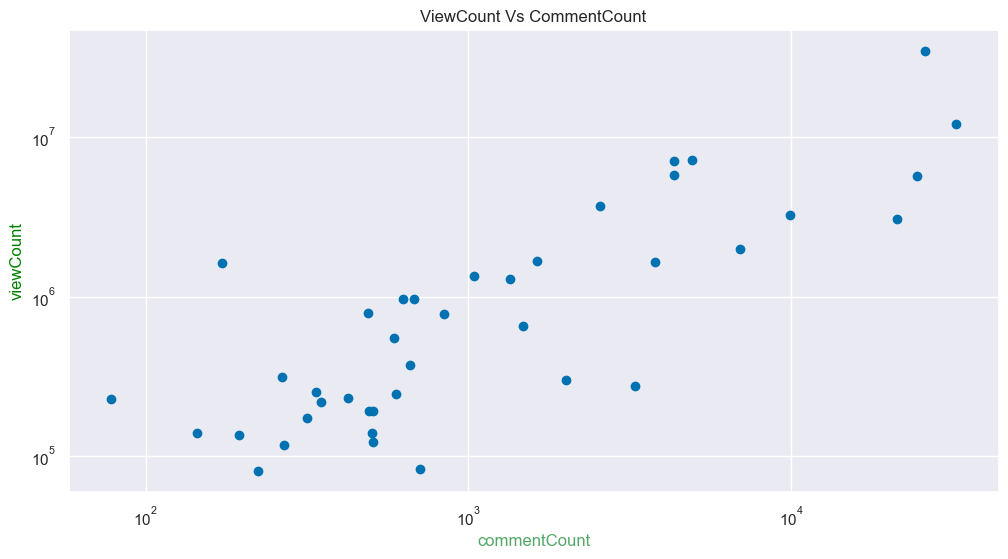

In [24]:
# plotting ViewCount against likeCount

plt.figure(figsize=(12,6))
plt.scatter(Ng_data['commentCount'], Ng_data['viewCount'])
plt.xscale("log")
plt.yscale('log')
plt.style.use('seaborn-v0_8-colorblind')
plt.title("ViewCount Vs CommentCount")
plt.ylabel("viewCount", color= "Green")
plt.xlabel("commentCount", color= "g")

plt.savefig("US_plot.png")

plt.show()

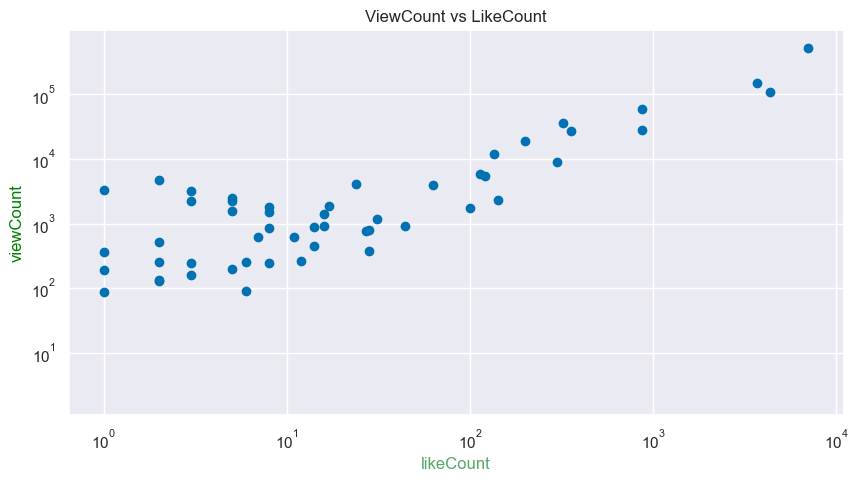

In [25]:
plt.figure(figsize=(10,5))
plt.scatter(US_data['likeCount'], US_data['viewCount'])
plt.xscale("log")
plt.yscale('log')
plt.style.use('seaborn-v0_8-colorblind')
plt.title("ViewCount vs LikeCount")
plt.ylabel("viewCount", color= "Green")
plt.xlabel("likeCount", color= "g")

plt.savefig("US_plot.png")
plt.show()

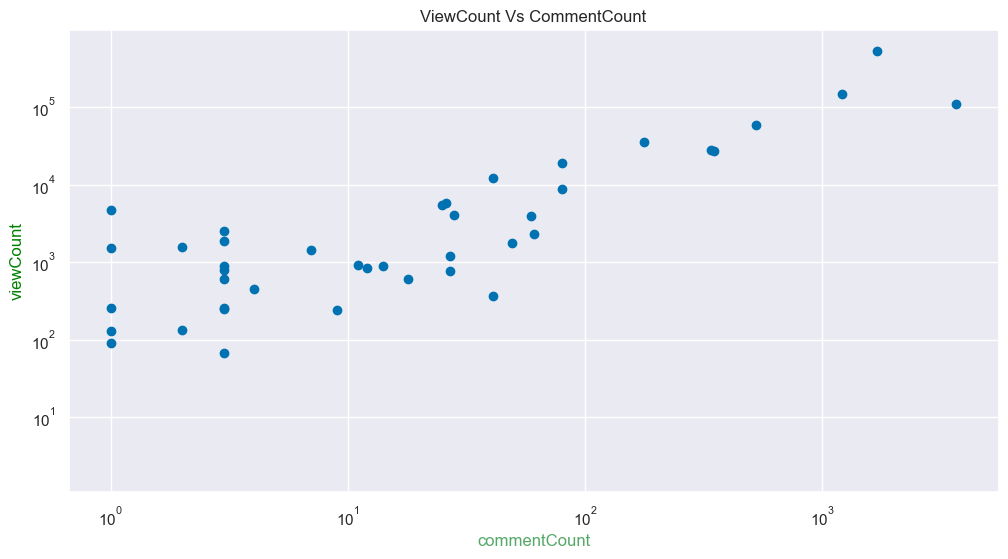

In [26]:
# plotting ViewCount against likeCount

plt.figure(figsize=(12,6))
plt.scatter(US_data['commentCount'], US_data['viewCount'])
plt.xscale("log")
plt.yscale('log')
plt.style.use('seaborn-v0_8-colorblind')
plt.title("ViewCount Vs CommentCount")
plt.ylabel("viewCount", color= "Green")
plt.xlabel("commentCount", color= "g")
plt.show()

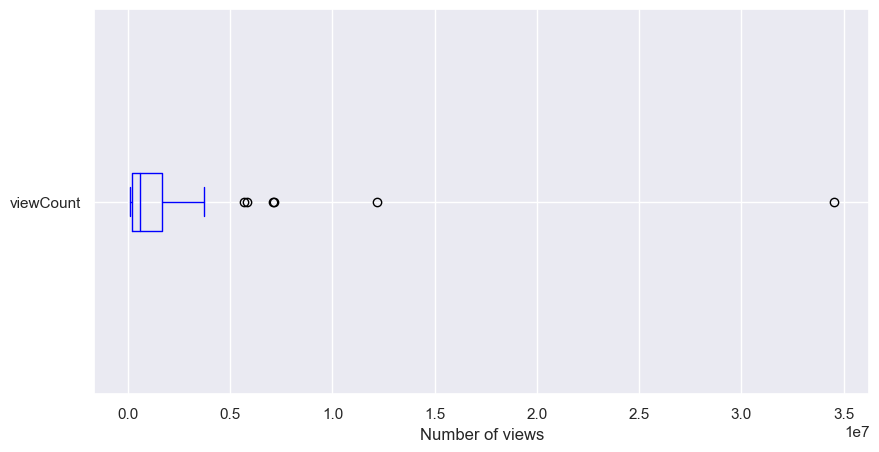

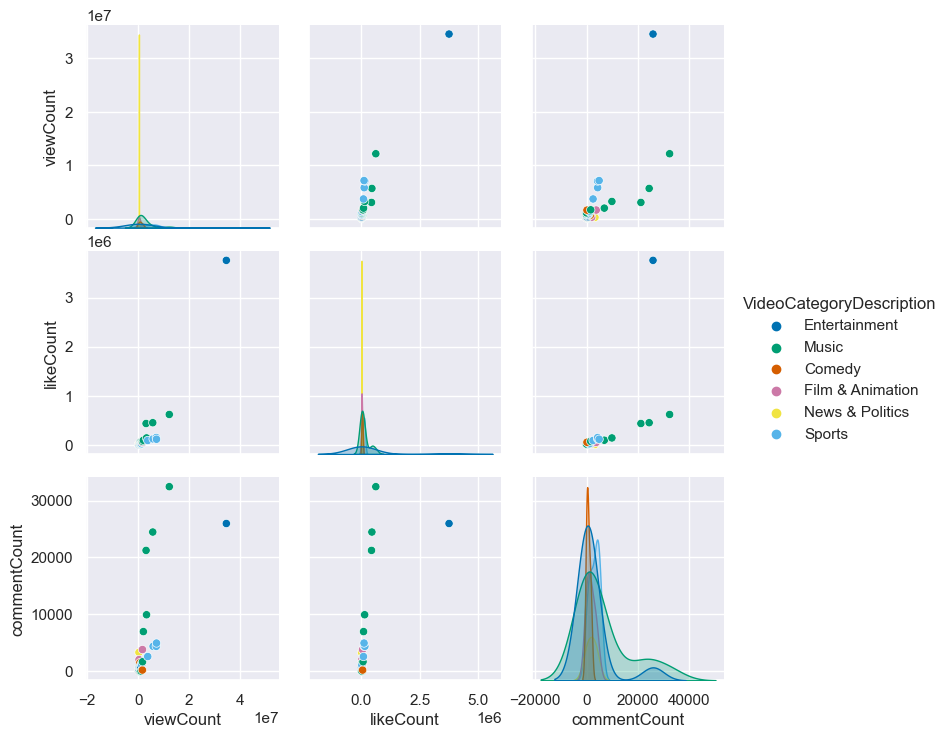

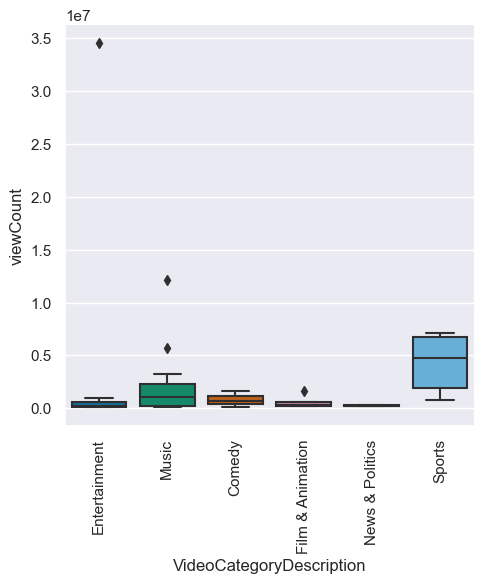

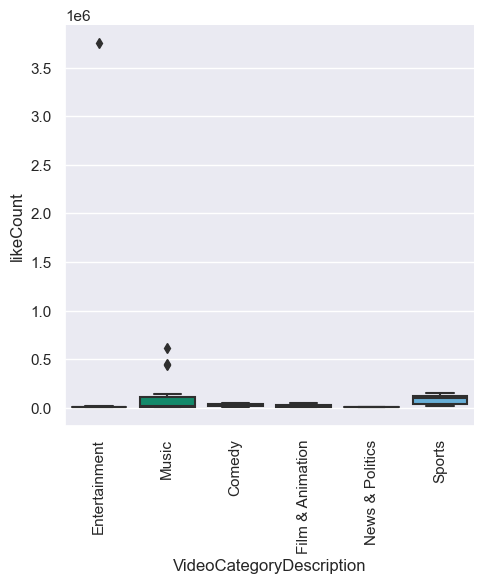

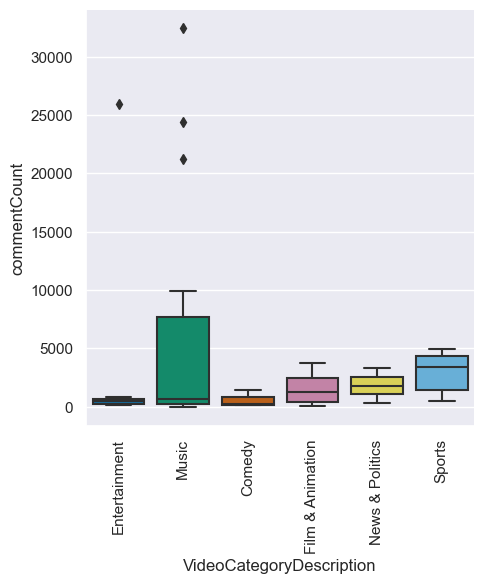

In [27]:
plt.figure(figsize= (12,6))
Ng_data['viewCount'].plot(kind='box', vert=False, color='blue',
                        figsize=(10,5))

plt.xlabel('Number of views')
plt.show()
# Boxplots with seaborn
sns.pairplot(data=Ng_data, hue="VideoCategoryDescription")
sns.catplot(x="VideoCategoryDescription", y="viewCount", kind="box", data=Ng_data).set_xticklabels(rotation=90)
plt.savefig("ng_box_plot2.png")
sns.catplot(x="VideoCategoryDescription", y="likeCount", kind="box", data=Ng_data).set_xticklabels(rotation=90)
plt.savefig("ng_box_plot3.png")
sns.catplot(x="VideoCategoryDescription", y="commentCount", kind="box", data=Ng_data).set_xticklabels(rotation=90)

plt.savefig("ng_box_plot.png")

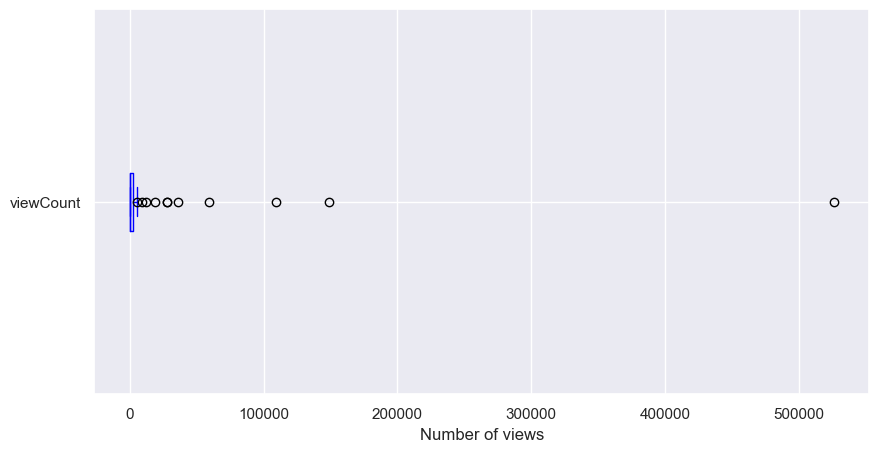

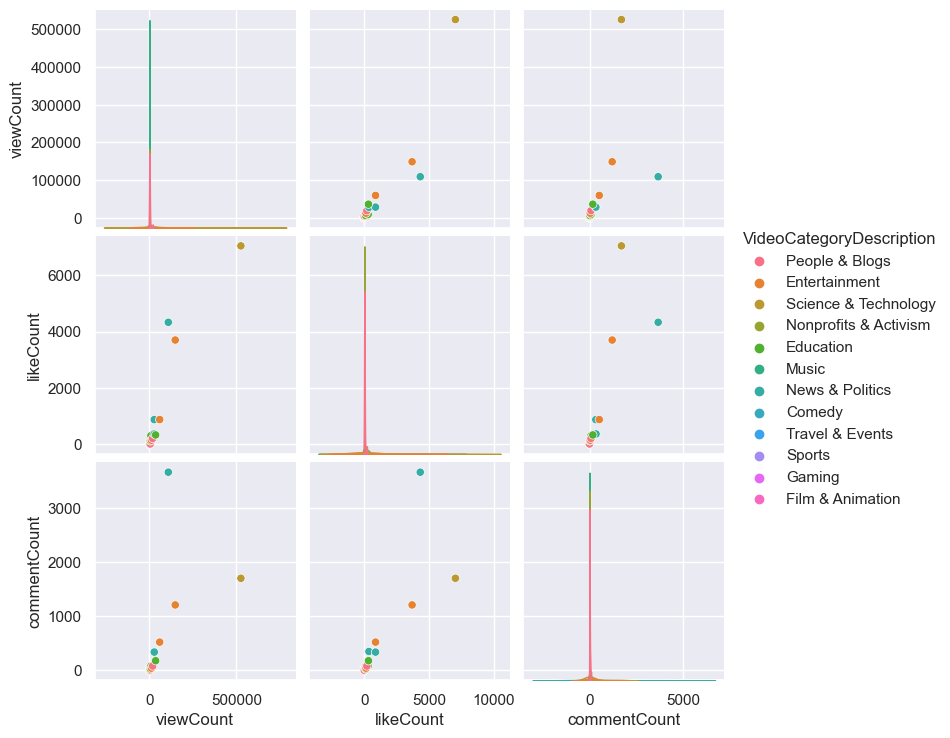

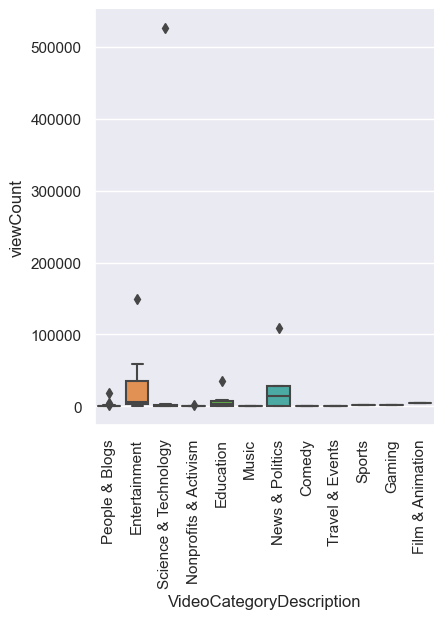

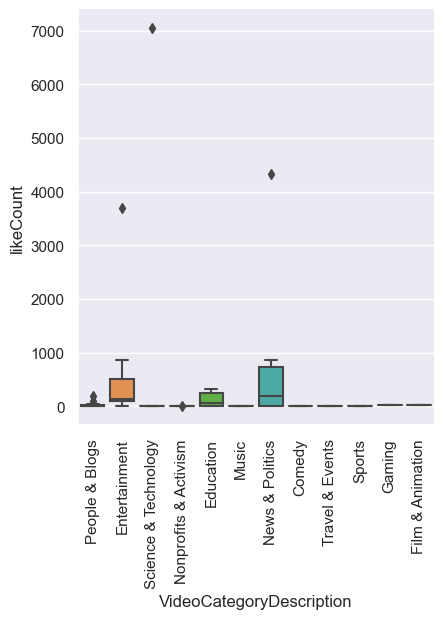

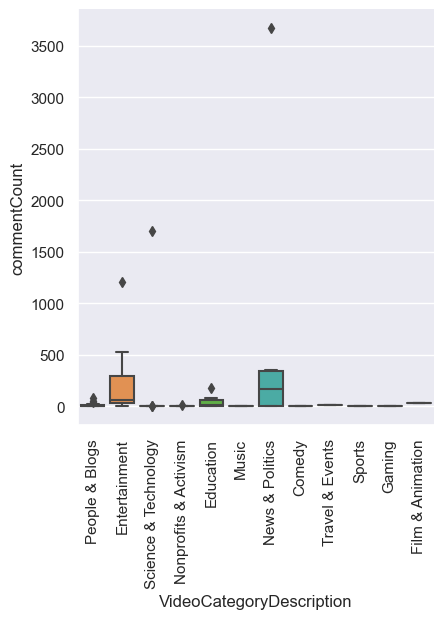

In [28]:
plt.figure(figsize= (12,6))
US_data['viewCount'].plot(kind='box', vert=False, color='blue',
                        figsize=(10,5))

plt.xlabel('Number of views')
plt.show()
# Boxplots with seaborn
sns.pairplot(data=US_data, hue="VideoCategoryDescription")
sns.catplot(x="VideoCategoryDescription", y="viewCount", kind="box", data=US_data).set_xticklabels(rotation=90)
plt.savefig("USbox_plot1.png")
sns.catplot(x="VideoCategoryDescription", y="likeCount", kind="box", data=US_data).set_xticklabels(rotation=90)
plt.savefig("USbox_plot.png")
sns.catplot(x="VideoCategoryDescription", y="commentCount", kind="box", data=US_data).set_xticklabels(rotation=90)

plt.savefig("USbox_plot.png")

# **WORD EMBEDDINGS USING WORD2VEC MODEL IN NATURAL LANGUAGE PROCESSING**

1. Import the natural language toolkit nltk and the relevant modules
2. Subset the column to convert to vectors which in this case is the title column in the Nigera dataset
3. Create an empty list, run a for loop on the dataset to remove punctuations using RegexpTokenizer and convert the words to numbers using .tokenize
4. Remove all english stop words in the dictionary, eg: "The", "Then", "Is", "and" etc 
5. Using .append, add the cleaned words into the empty list "Ng_word_list" created intially.

In [29]:
import tensorflow as tf

import string
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /Users/kel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
# subsetting the Nigeria title column
Ng_words = Ng_data[["title"]]
Ng_words.head()

title
35                                      SEE WAHALA O 
26  Blaqbonez - Fake Nikes (Feat. Blxckie & Cheque...
40  PERFECT ASSISTANT- Watch Maurice Sam and Shine...
17  Aranda Ekun Part 3 - Latest Yoruba Movie 2022 ...
49                                  Police Internship

In [31]:
#Create an empty list 

Ng_words_list = list()

indiv_lines = Ng_words['title'].values.tolist()

for line in indiv_lines:
    
    #create word tokens and remove punctuations in one go, r means regular expression
    rem_tok_punc = RegexpTokenizer(r'\w+')
    
    tokens = rem_tok_punc.tokenize(line)
    
    #convert all words to lower case
    words = [w.lower() for w in tokens]
    
    #Invoke all the english stopwords and removing duplicates using the set operator
    stop_word_list = set(stopwords.words("english"))
    
    #Remove stop words
    words = [w for w in words if not w in stop_word_list]
    
    #append words in the Ng_words_list 
    Ng_words_list.append(words)

print(Ng_words_list)

[['see', 'wahala'], ['blaqbonez', 'fake', 'nikes', 'feat', 'blxckie', 'cheque', 'visualizer'], ['perfect', 'assistant', 'watch', 'maurice', 'sam', 'shine', 'rosman', 'another', 'fine', 'romcom'], ['aranda', 'ekun', 'part', '3', 'latest', 'yoruba', 'movie', '2022', 'premium', 'odunlade', 'adekola', 'femi', 'adebayo', 'bose', 'akinola'], ['police', 'internship'], ['phyno', 'bbo', 'bad', 'bxtches', 'official', 'video'], ['mr', 'mrs', 'sunday', '2', 'yoruba', 'latest', 'movie', '2022', 'drama', 'smally', 'mide', 'abiodun', 'opeyemi', 'aiyeola'], ['olosho', 'ghetto', '3', 'latest', 'yoruba', 'movie', '2022', 'drama', 'starring', 'olayinka', 'solomon', 'ibrahim', 'yekini', 'kemi', 'apesin'], ['oko', 'stone', 'latest', 'yoruba', 'movie', '2022', 'mide', 'martins', 'muyiwa', 'ademola', 'bolanle', 'salisu', 'mama', 'ereko'], ['bella', 'shmurda', 'contraband', 'visualizer'], ['money', 'love'], ['rush'], ['bella', 'shmurda', 'simi', 'loose', 'visualizer'], ['street', 'alhaja', 'yoruba', 'movie', 

# **WORD2VEC**

1. Import gensim module  -- This module implements the word2vec family of algorithms, and in this case we are using Skip-Gram model
2. The vector length is determined by the using an Embedding dimension of 100. 
3. In creating the model, sentences are iterable, so as to allow the algorithm stream over the dataset multiple times

In [32]:
import gensim

In [33]:
Embedding_Dim = 100
#train word2vec model

model = gensim.models.Word2Vec(sentences = Ng_words_list, vector_size = Embedding_Dim, workers = 5, min_count = 1, window = 5)

#determining the vocabulary size 

words = model.wv
print("The Vocabulary Size is ", len(words))


The Vocabulary Size is  220


In [34]:
model.save("word2vec.model")

In [36]:
vector = model.wv['liverpool']  # get numpy vector of a word
sims = model.wv.most_similar('liverpool', topn=10)  # get other similar words
sims

[('bella', 0.2703595459461212),
 ('aranda', 0.2404491901397705),
 ('vs', 0.23842844367027283),
 ('feat', 0.23546744883060455),
 ('mrbeast', 0.2169600874185562),
 ('adekola', 0.19353830814361572),
 ('wike', 0.19038799405097961),
 ('alhaja', 0.190230593085289),
 ('phyno', 0.18376606702804565),
 ('lift', 0.18372412025928497)]

## **SAME PROCEDURE DONE FOR THE US DATASET**

In [37]:
# subsetting the US title column

US_words = US_data[["channelTitle"]]
US_words

channelTitle
8                ellie pipkins
3              Alan Springwind
16                   CABIvideo
72                  ICRISAT Co
60                  ICRISAT Co
..                         ...
33               Your Mate Tom
30  The Natural Way of Healing
7          Black Pigeon Speaks
29            PsychedSubstance
9             PsychedSubstance

[72 rows x 1 columns]

In [38]:
#Create an empty list 

US_words_list = list()

indiv_lines = US_words['channelTitle'].values.tolist()

for line in indiv_lines:
    
    #create word tokens and remove punctuations in one go, r means regular expression
    rem_tok_punc = RegexpTokenizer(r'\w+')
    
    tokens = rem_tok_punc.tokenize(line)
    
    #convert all words to lower case
    words = [w.lower() for w in tokens]
    
    #Invoke all the english stopwords and removing duplicates using the set operator
    stop_word_list = set(stopwords.words("english"))
    
    #Remove stop words
    words = [w for w in words if not w in stop_word_list]
    
    #append words in the Ng_words_list 
    US_words_list.append(words)

len(US_words_list)

72

In [39]:
Embedding_Dim = 100
#train word2vec model

model1 = gensim.models.Word2Vec(sentences = US_words_list, vector_size = Embedding_Dim, workers = 4, min_count = 1)

#determining the vocabulary size 

words_US = model1.wv
print("The Vocabulary Size is ", len(words_US))

The Vocabulary Size is  97


In [40]:
word_model = model1.save("word2vec.model1")
word_model

In [41]:
vector_US = model1.wv['nate']  # get numpy vector of a word
sims_US = model1.wv.most_similar("nate", topn=10)  # get other similar words
sims_US

[('sf', 0.20511598885059357),
 ('capsugelptg', 0.18393917381763458),
 ('kratom', 0.16467441618442535),
 ('mralexandridis', 0.15380676090717316),
 ('talk', 0.1532675325870514),
 ('theoriginsofreligion', 0.15047027170658112),
 ('clinic', 0.14640605449676514),
 ('ellie', 0.14100119471549988),
 ('pty', 0.139992818236351),
 ('brave', 0.13523685932159424)]